In [238]:
import random

import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

# to play the audio files
from IPython.display import Audio
from pydub import AudioSegment
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import openpyxl
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow


In [239]:
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [240]:
# Location of the dataset
# Path for Ravdess dataset
ravdess = "datasets/RavdevsLow"
# Path for Savee dataset
savee = "datasets/Savee"
# Path for Tess dataset
tess = "datasets/TESS"
# Path for CREMA-D dataset
cremaD = "datasets/CremaD"
# Path for EVOV-DB
emoDB = "datasets/EMOV-DB"
# Path for JL
jl = "datasets/JL"
# Path for JL2
jl2 = "datasets/JL2"
# Path for IEMOCAP
iemocap = "datasets/IEMOCAP"
# Path for ML-END
mlEnd = "datasets/MLEnd"

In [241]:
def categorizeEmotion(emote):
    if emote == "neu":
        emote = "neutral"
    elif emote == "fru" or emote == "ang":
        emote = "angry"
    elif emote == "exc" or emote == "hap":
        emote = "happy"
    elif emote == "sur":
        emote = "surprise"
    elif emote == "dis":
        emote = "disgust"
    elif emote == "fea":
        emote = "fear"
    return emote

In [242]:
 mlEnd_directory_list = os.listdir(mlEnd)
# file_emotion = []
# file_path = []
# fileAndEmotion = {}
# mlEnd_data_from_excel = pd.read_excel("MlEnd.xlsx")
# for filename, fileEmotion in zip(mlEnd_data_from_excel["id"], mlEnd_data_from_excel["emotion"]):
#     fileEmotion = categorizeEmotion(fileEmotion)
#     fileAndEmotion[str(filename).zfill(5)]=fileEmotion
# for file in mlEnd_directory_list:
#     file = file.split(".")[0]
#     for keys in fileAndEmotion:
#         if file == keys:
#             file_emotion.append(fileAndEmotion[keys])
#             file_path.append(mlEnd+"/"+file+".wav")
# emocount = {}
# for emo in file_emotion:
#     if emo in emocount:
#         emocount[emo]+=1
#     else:
#         emocount[emo]=1
# print(emocount)
#
# file_path_df = pd.DataFrame(file_path,columns=["path"])
# file_emotion_df = pd.DataFrame(file_emotion,columns=["Emotions"])


# Result
# {'excited': 8223, 'question': 8202, 'neutral': 8187, 'bored': 8042}

THis is for Iemocap. USE later

In [243]:
file_emotion = []
file_path = []
iemocap_directory_list = os.listdir(iemocap)

iemocap_data_from_excel = pd.read_excel("iemocap.xlsx")
fileAndEmotion = {}
for filename, fileEmotion in zip(iemocap_data_from_excel["id"], iemocap_data_from_excel["emotion"]):
    fileEmotion = categorizeEmotion(fileEmotion)
    fileAndEmotion[filename]=fileEmotion
for file in iemocap_directory_list:
    file = file.split(".")[0]
    for keys in fileAndEmotion:
        if file == keys and fileAndEmotion[keys]!= "xxx" and fileAndEmotion[keys]!="oth":
            file_emotion.append(fileAndEmotion[keys])
            file_path.append(iemocap+"/"+file+".wav")
emocount = {}
for emo in file_emotion:
    if emo in emocount:
        emocount[emo]+=1
    else:
        emocount[emo]=1
print(emocount)

file_path_df = pd.DataFrame(file_path,columns=["Path"])
file_emotion_df = pd.DataFrame(file_emotion,columns=["Emotions"])
iemocap_df = pd.concat([file_emotion_df,file_path_df],axis=1)
print(iemocap_df.shape)
iemocap_df.head()

{'neutral': 1702, 'angry': 2934, 'sad': 1062, 'happy': 1621, 'surprise': 107, 'fear': 40, 'disgust': 2}
(7468, 2)


,Emotions,Path
0,neutral,datasets/IEMOCAP/Ses01F_impro01_F000.wav
1,neutral,datasets/IEMOCAP/Ses01F_impro01_F001.wav
2,neutral,datasets/IEMOCAP/Ses01F_impro01_F002.wav
3,neutral,datasets/IEMOCAP/Ses01F_impro01_F005.wav
4,angry,datasets/IEMOCAP/Ses01F_impro01_F006.wav


FOR JL, use it later

In [244]:
jl_directory_list = os.listdir(jl)
file_emotion = []
file_path = []
emotionList = ["happy", "neutral", "sad", "angry", "fear", "disgust", "surprise"]

for file in jl_directory_list:
    emotionName = file.split("_")[1]
    if emotionName == "anxious" or emotionName == "concerned":
        emotionName = "fear"
    elif emotionName == "apologetic":
        emotionName = "sad"
    elif emotionName == "excited":
        emotionName = "happy"
    for item in emotionList:
        if emotionName == item:
            file_emotion.append(emotionName)
            file_path.append(jl + "/" + file)
emotion_df = pd.DataFrame(file_emotion, columns=["Emotions"])
path_df = pd.DataFrame(file_path, columns=["Path"])
jl_df = pd.concat([emotion_df, path_df], axis=1)
emotions = {}
for emo in jl_df["Emotions"]:
    if emo in emotions:
        emotions[emo] += 1
    else:
        emotions[emo] = 1
print(emotions)
print(jl_df.shape)
jl_df.head()

{'angry': 240, 'fear': 480, 'sad': 480, 'happy': 480, 'neutral': 240}
(1920, 2)


,Emotions,Path
0,angry,datasets/JL/female1_angry_10a_1.wav
1,angry,datasets/JL/female1_angry_10a_2.wav
2,angry,datasets/JL/female1_angry_10b_1.wav
3,angry,datasets/JL/female1_angry_10b_2.wav
4,angry,datasets/JL/female1_angry_11a_1.wav


FOR JL2, use it later

In [245]:
jl2_directory_list = os.listdir(jl2)
file_emotion = []
file_path = []
emotionList = ["happy", "neutral", "sad", "angry", "fear", "disgust", "surprise"]
for folder in jl2_directory_list:
    subfolder = jl2 + "/" + folder
    surveyList = os.listdir(subfolder)
    for survey in surveyList:
        pages = subfolder + "/" + survey
        pageList = os.listdir(pages)
        for page in pageList:
            files = pages + "/" + page
            fileList = os.listdir(files)
            for file in fileList:
                if file == "cleaned":
                    continue
                elif file.startswith("Select"):
                    emotionName = file.split("_")[2]
                else:
                    emotionName = file.split("_")[1]
                if emotionName == "anxious" or emotionName == "concerned":
                    emotionName = "fear"
                elif emotionName == "apologetic":
                    emotionName = "sad"
                elif emotionName == "excited":
                    emotionName = "happy"
                for item in emotionList:
                    if emotionName == item:
                        file_emotion.append(emotionName)
                        file_path.append(files + "/" + file)
file_path.__len__()
emotion_df = pd.DataFrame(file_emotion, columns=["Emotions"])
path_df = pd.DataFrame(file_path, columns=["Path"])
jl2_df = pd.concat([emotion_df, path_df], axis=1)
emotions= {}
for emo in jl_df["Emotions"]:
    if emo in emotions:
        emotions[emo] += 1
    else:
        emotions[emo] = 1
print(jl2_df.shape)
jl2_df.head()

(1952, 2)


,Emotions,Path
0,angry,datasets/JL2/main_emotion/main_survey_1/page1/...
1,happy,datasets/JL2/main_emotion/main_survey_1/page1/...
2,happy,datasets/JL2/main_emotion/main_survey_1/page1/...
3,neutral,datasets/JL2/main_emotion/main_survey_1/page1/...
4,sad,datasets/JL2/main_emotion/main_survey_1/page1/...


For EMO-DB, Use it later

In [246]:
emoDb_directory_list = os.listdir(emoDB)
file_emotion = []
file_path = []

for dir in emoDb_directory_list:
    parentFolder = emoDB + "/" + dir
    actorsList = os.listdir(parentFolder)
    for folders in actorsList:
        childFolder = parentFolder + "/" + folders
        files = os.listdir(childFolder)
        for item in files:
            part = item.split("_")
            if part[0].lower() == "anger":
                file_emotion.append("angry")
            elif part[0].lower() == "amused":
                file_emotion.append("surprise")
            else:
                file_emotion.append(part[0].lower())
            # file_emotion.append(part[0])
            file_path.append(childFolder + "/" + item)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
emoDB_df = pd.concat([emotion_df, path_df], axis=1)
# emoDB_df.to_excel("emo.xlsx",index=0)
print(emoDB_df.shape)
emoDB_df.head()


(5172, 2)


,Emotions,Path
0,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0001.wav
1,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0002.wav
2,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0003.wav
3,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0004.wav
4,surprise,datasets/EMOV-DB/Bea/Amused/amused_1-15_0005.wav


In [247]:
ravdess_directory_list = os.listdir(ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:

    actor = os.listdir(ravdess + "/" + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + "/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad',
                             5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)
Ravdess_df.head()
print(Ravdess_df.shape)


(1440, 2)


In [248]:
crema_directory_list = os.listdir(cremaD)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(cremaD + "/" + file)
    # storing file emotions
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.shape)


(7442, 2)


In [249]:
tess_directory_list = os.listdir(tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(tess + "/" + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(tess + "/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df.shape)
Tess_df.head()


(2800, 2)


,Emotions,Path
0,angry,datasets/TESS/OAF_angry/OAF_back_angry.wav
1,angry,datasets/TESS/OAF_angry/OAF_bar_angry.wav
2,angry,datasets/TESS/OAF_angry/OAF_base_angry.wav
3,angry,datasets/TESS/OAF_angry/OAF_bath_angry.wav
4,angry,datasets/TESS/OAF_angry/OAF_bean_angry.wav


In [250]:
savee_directory_list = os.listdir(savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(savee + "/" + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print(Savee_df.shape)
Savee_df.head()

(480, 2)


,Emotions,Path
0,angry,datasets/Savee/DC_a01.wav
1,angry,datasets/Savee/DC_a02.wav
2,angry,datasets/Savee/DC_a03.wav
3,angry,datasets/Savee/DC_a04.wav
4,angry,datasets/Savee/DC_a05.wav


In [251]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df,emoDB_df, jl_df, jl2_df, iemocap_df], axis = 0)
# data_path = pd.concat([Crema_df, Tess_df, Savee_df], axis=0)
# data_path = pd.concat([Savee_df], axis=0)
data_path.to_csv("data_path.csv", index=False)
data_path.head()

,Emotions,Path
0,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-01-01...
1,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-01-02...
2,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-02-01...
3,neutral,datasets/RavdevsLow/Actor_01/03-01-01-01-02-02...
4,neutral,datasets/RavdevsLow/Actor_01/03-01-02-01-01-01...


In [252]:
# data_path["Emotions"].count()
# data_path["Emotions"].value_counts()
data_path.dtypes

Emotions    object
Path        object
dtype: object

In [253]:
emotionList = pd.read_csv("data_path.csv")
emotions = emotionList["Emotions"]
emotionCount = {}
for item in emotions:
    if item in emotionCount:
        emotionCount[item] += 1
    else:
        emotionCount[item] = 1
print(emotionCount)

{'neutral': 5649, 'happy': 4512, 'sad': 3953, 'angry': 6609, 'fear': 2931, 'disgust': 2944, 'surprise': 2076}


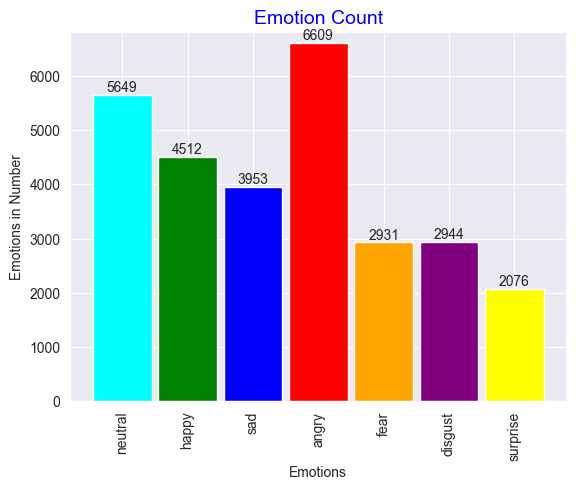

In [254]:
plt.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
        color=["cyan", "green", "blue", "red", "orange", "purple", "yellow"])
plt.xlabel("Emotions")
plt.xticks(rotation=90)
plt.ylabel("Emotions in Number")
plt.title("Emotion Count", size=14, color="Blue")
plt.ylim([0, max(emotionCount.values()) + 200])
lst = []
for item in emotionCount:
    plt.text(item, emotionCount[item],
             emotionCount[item], ha="center", va="bottom")

# emotionCount.values()

# for index, value in enumerate(emotionCount)
# for index,value in enumerate(emotionCount.values()):
#     plt.text(value,index,value)
# plt.show()


In [255]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


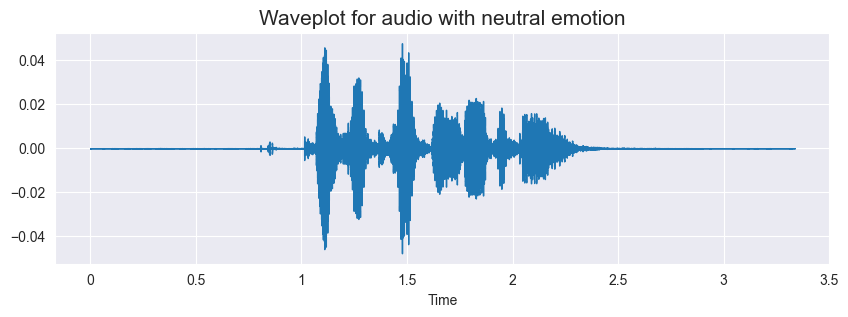

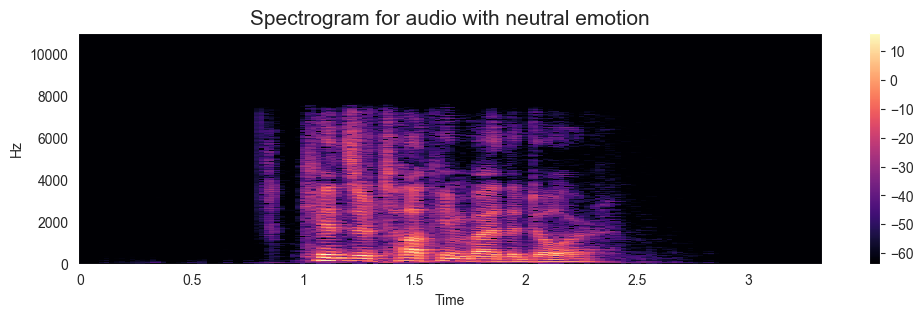

In [256]:
emotion = 'neutral'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


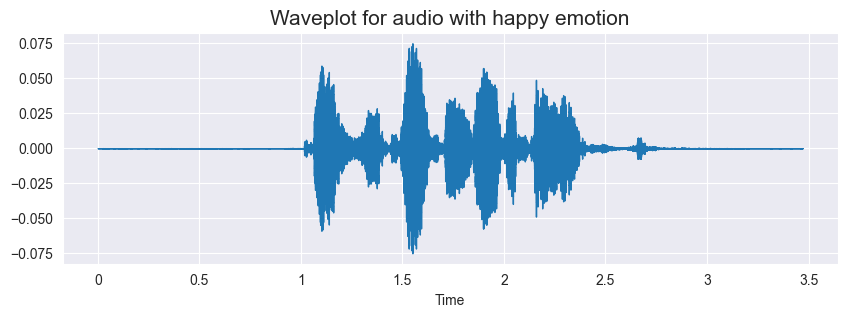

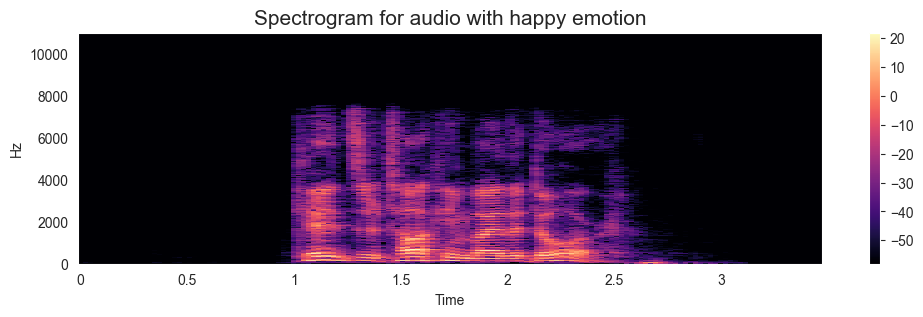

In [257]:
emotion = 'happy'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


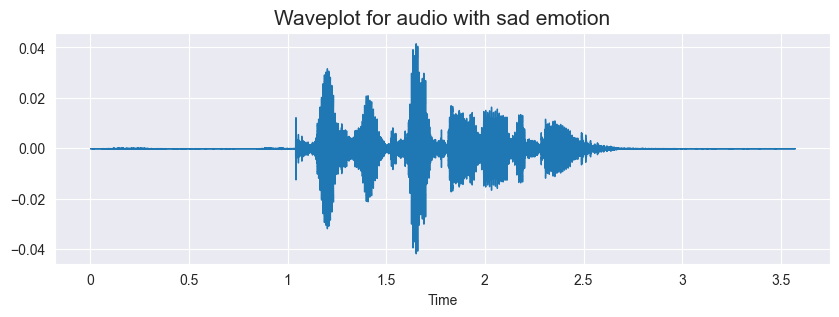

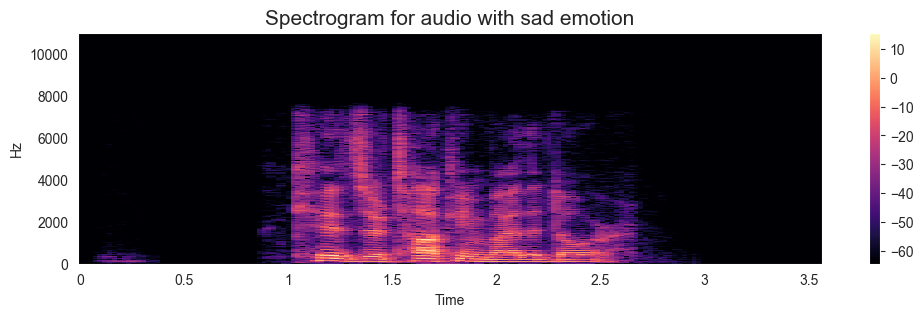

In [258]:
emotion = 'sad'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


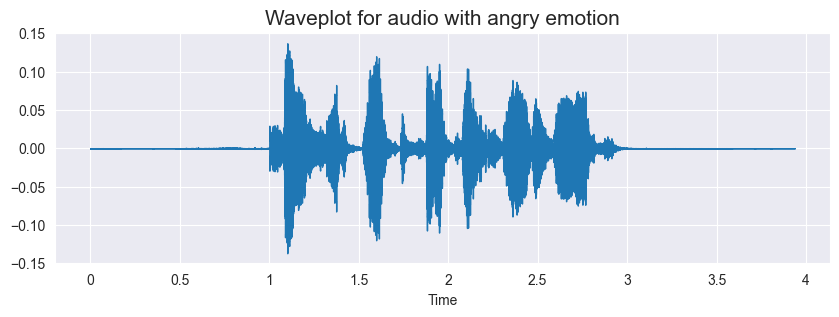

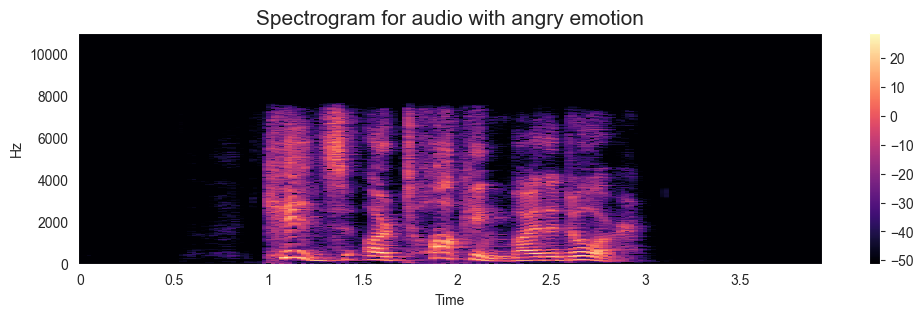

In [259]:
emotion = 'angry'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


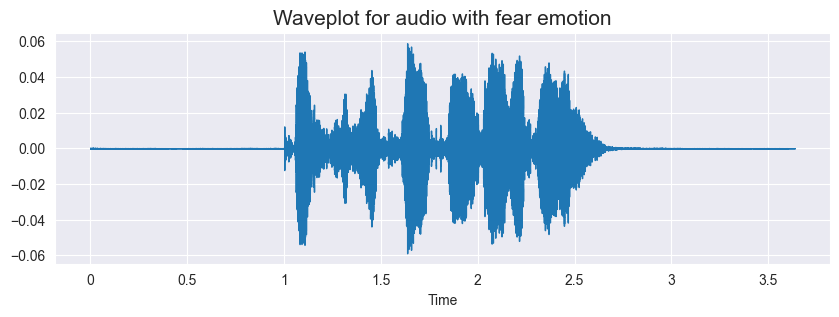

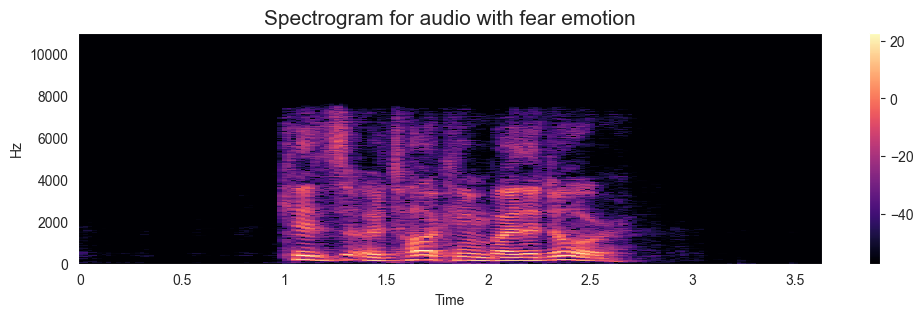

In [260]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


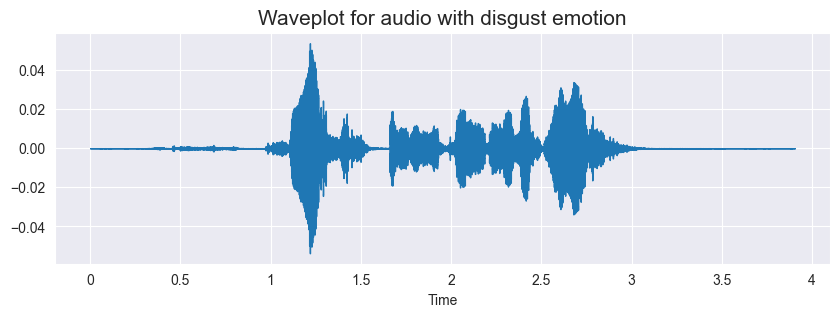

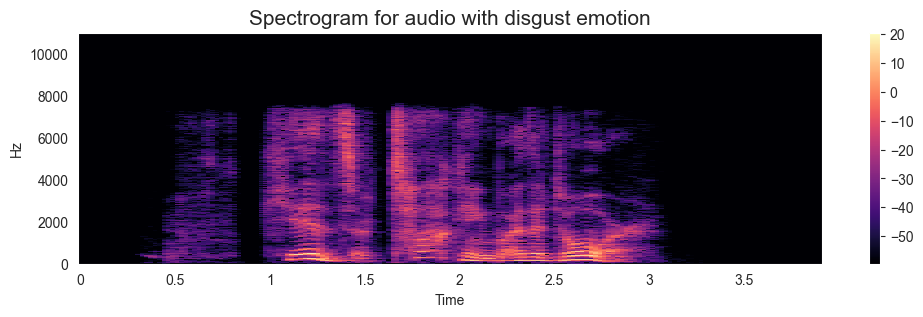

In [261]:
emotion = 'disgust'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


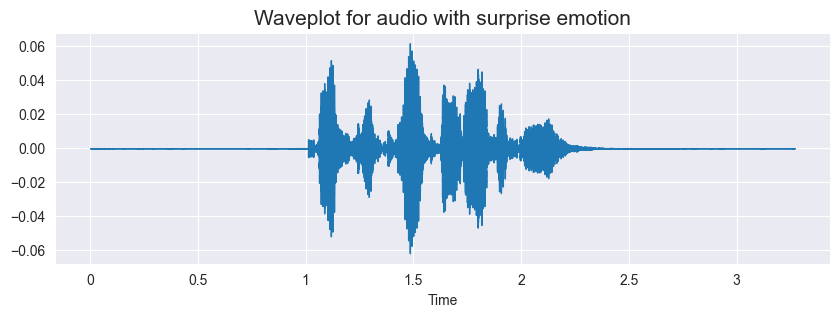

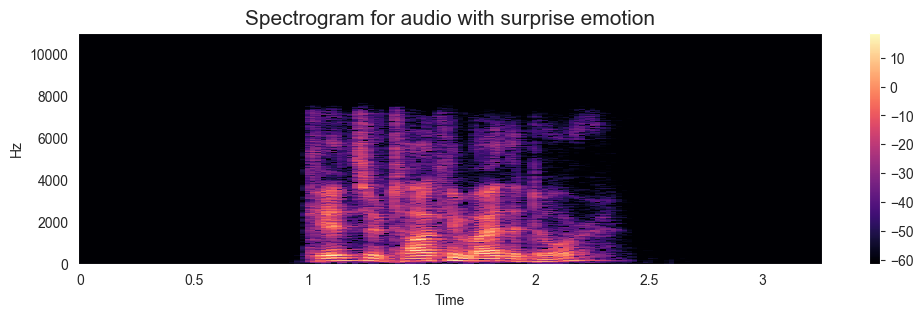

In [262]:
emotion = 'surprise'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [263]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data


def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


def volumeAdd(data):
    songData = AudioSegment.from_wav(data)
    print("sing", songData)
    songDataSamples = np.array(songData.get_array_of_samples())
    songHighVolumed = songDataSamples - 10000.0
    print(songHighVolumed)
    return songHighVolumed


datasets/RavdevsLow/Actor_01/03-01-01-01-01-02-01.wav


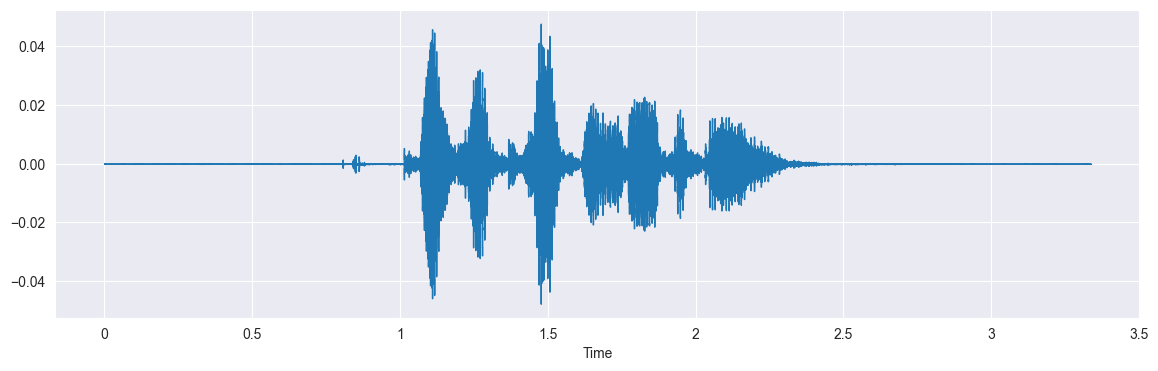

In [264]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
print(path)
data, sample_rate = librosa.load(path)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)


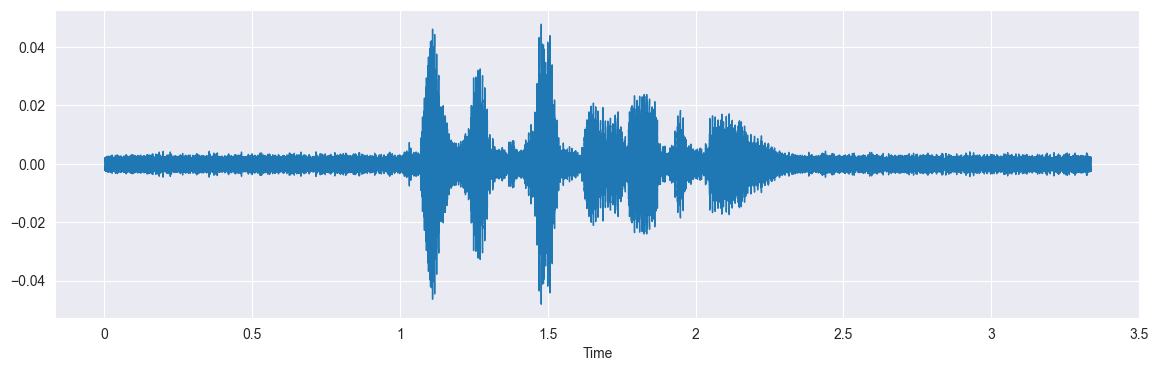

In [265]:
x = noise(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


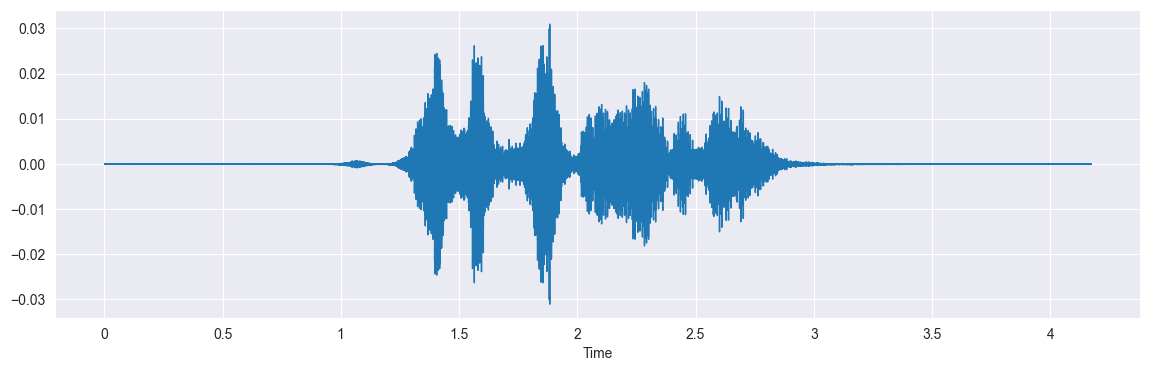

In [266]:
x = stretch(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


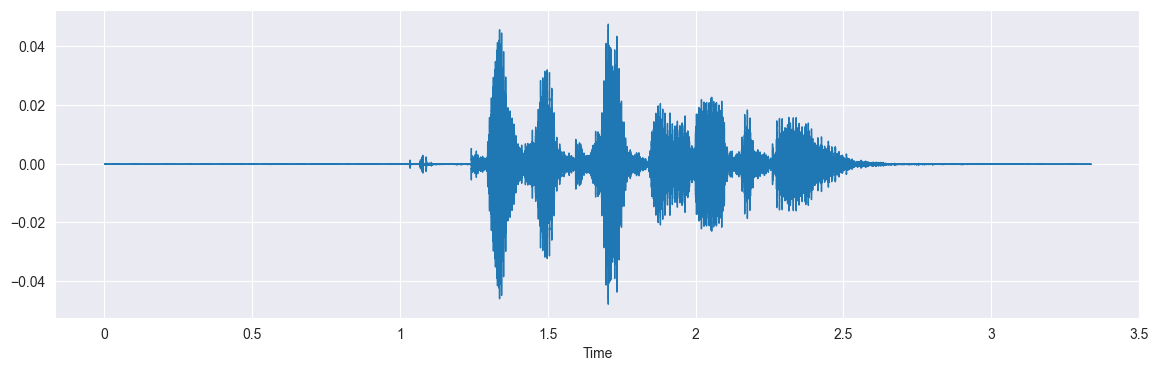

In [267]:
x = shift(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


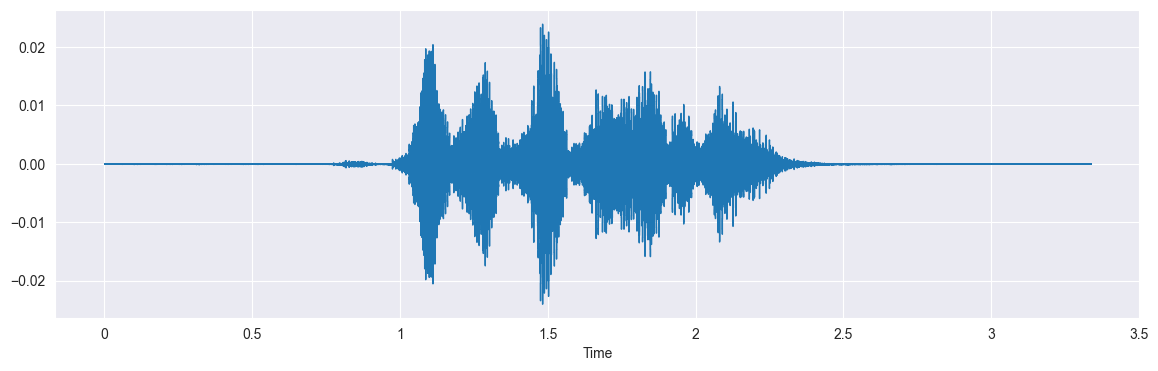

In [268]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


In [269]:
# x = volumeAdd(data)
# plt.figure(figsize=(14, 4))
# librosa.display.waveshow(y=x, sr=sample_rate)
# Audio(x, rate=sample_rate)


In [270]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(
        S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(
        y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))  # stacking vertically

    return result


In [271]:
# try:
#     featureDf = pd.read_csv('features.xlsx')
# except:
#     print("error")
# if featureDf.empty:
#     print("null")


In [272]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    try:
        feature = get_features(path)
    except:
        print(path)
        print(emotion)
    for ele in feature:
        try:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
        except:
            print(ele)

In [273]:
len(X), len(Y), data_path.Path.shape

(86022, 86022, (28674,))

In [274]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_excel('features.xlsx', index=False)
Features.head()


,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.224306,0.664190,0.693038,0.665390,0.673116,0.696442,0.684787,0.706183,0.748844,0.782297,...,6.888786e-17,6.993841e-17,7.601734e-17,7.305700e-17,6.833248e-17,7.254374e-17,7.962738e-17,7.395194e-17,7.358765e-17,neutral
1,0.329748,0.799268,0.833142,0.825737,0.808983,0.822607,0.761198,0.682656,0.716394,0.759216,...,1.142208e-04,1.143676e-04,1.275669e-04,1.166499e-04,1.129812e-04,1.120687e-04,1.175108e-04,1.149833e-04,1.198561e-04,neutral
2,0.169383,0.579495,0.662042,0.674849,0.631609,0.623019,0.687452,0.671907,0.692694,0.712601,...,1.885160e-15,1.743947e-15,1.590055e-15,1.477827e-15,1.528373e-15,1.689925e-15,1.679742e-15,1.602365e-15,1.500745e-15,neutral
3,0.196533,0.652948,0.692924,0.664361,0.648762,0.686783,0.688136,0.683010,0.735986,0.759067,...,7.385022e-17,6.953342e-17,7.445123e-17,7.997667e-17,7.754531e-17,8.110750e-17,7.647288e-17,7.359221e-17,7.287652e-17,neutral
4,0.256637,0.696101,0.735395,0.743255,0.708621,0.710354,0.727939,0.642871,0.666676,0.699946,...,6.795466e-07,7.321407e-07,7.140911e-07,7.212972e-07,6.790251e-07,7.102171e-07,7.076779e-07,7.033925e-07,7.305891e-07,neutral


In [275]:
features_df = pd.read_excel("features.xlsx")
features_df.columns
featuresofit = np.asarray(Features.iloc[:, :-1].values)
labelofit = np.asarray(Features["labels"].values)

In [276]:
X = Features.iloc[:, :-1].values
Y = Features['labels'].values
y_labels = Y

In [277]:
# encoder = OneHotEncoder()
# Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()
# print(Y)

In [278]:
# print(Y)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, random_state=0, test_size=0.1, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# pd.DataFrame(Y)

((77419, 162), (77419,), (8603, 162), (8603,))

In [279]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((77419, 162), (77419,), (8603, 162), (8603,))

In [280]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [281]:
# x_train = np.expand_dims(x_train, axis=2)
# x_test = np.expand_dims(x_test, axis=2)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape


In [282]:
kernelchoice = ["rbf"]
C_choice = [150,200,250,300,350]
import random

In [283]:
from sklearn import svm
from sklearn.metrics import accuracy_score

for i in C_choice:
    a=random.choice(kernelchoice)
    b=random.choice(C_choice)
    classifier = svm.SVC(kernel=a, gamma="auto", C=b)
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    accuracyPercent = accuracy_score(y_test, y_predict) * 100
    print("Kernel:  "+ str(a) + "  ||  "+" C: " + str(b) +"  ||  Accuracy"+ "  :  " + str(accuracyPercent))

Kernel:  rbf  ||   C: 150  ||  Accuracy  :  21.236777868185516
Kernel:  rbf  ||   C: 150  ||  Accuracy  :  21.236777868185516
Kernel:  rbf  ||   C: 200  ||  Accuracy  :  21.085667790305706
Kernel:  rbf  ||   C: 250  ||  Accuracy  :  21.039172381727305
Kernel:  rbf  ||   C: 150  ||  Accuracy  :  21.236777868185516


Kernel:  poly  ||   C: 0.4  ||  Accuracy  :  39.415604600559526
Kernel:  poly  ||   C: 0.1  ||  Accuracy  :  31.520049735778677
Kernel:  poly  ||   C: 0.6  ||  Accuracy  :  41.156356854212
Kernel:  sigmoid  ||   C: 0.6  ||  Accuracy  :  39.3534348772148
Kernel:  poly  ||   C: 0.6  ||  Accuracy  :  41.156356854212
Kernel:  poly  ||   C: 1  ||  Accuracy  :  43.36338203294996
Kernel:  rbf  ||   C: 0.1  ||  Accuracy  :  51.75629468448866
Kernel:  sigmoid  ||   C: 1  ||  Accuracy  :  37.48834317687286
Kernel:  sigmoid  ||   C: 0.5  ||  Accuracy  :  39.72645321728318
Kernel:  linear  ||   C: 0.5  ||  Accuracy  :  53.590301523158224
Kernel:  linear  ||   C: 0.1  ||  Accuracy  :  53.71464096984768
Kernel:  poly  ||   C: 0.4  ||  Accuracy  :  39.415604600559526
Kernel:  sigmoid  ||   C: 0.4  ||  Accuracy  :  40.19272614236867
Kernel:  poly  ||   C: 0.6  ||  Accuracy  :  41.156356854212
Kernel:  rbf  ||   C: 0.6  ||  Accuracy  :  56.978551445446065
Kernel:  poly  ||   C: 0.9  ||  Accuracy  :  43.17687286291576
Kernel:  rbf  ||   C: 0.9  ||  Accuracy  :  58.25303077401306
Kernel:  rbf  ||   C: 0.4  ||  Accuracy  :  56.014920733602736
Kernel:  linear  ||   C: 1  ||  Accuracy  :  53.559216661485856
Kernel:  poly  ||   C: 0.4  ||  Accuracy  :  39.415604600559526
Kernel:  poly  ||   C: 0.1  ||  Accuracy  :  31.520049735778677

In [284]:

print()
# print("Accuracy of our model on test data : ",
#       model.evaluate(x_test, y_test)[1] * 100, "%")


In [285]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       angry       0.34      0.33      0.34      1908
     disgust       0.16      0.05      0.08       882
        fear       0.12      0.16      0.14       917
       happy       0.18      0.42      0.25      1347
     neutral       0.29      0.05      0.09      1738
         sad       0.19      0.28      0.22      1184
    surprise       0.15      0.02      0.03       627

    accuracy                           0.21      8603
   macro avg       0.20      0.19      0.17      8603
weighted avg       0.23      0.21      0.19      8603



In [286]:
# model = Sequential()
# model.add(Conv1D(256, kernel_size=5, strides=1, padding='same',
#                  activation='relu', input_shape=(x_train.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
#
# model.add(Conv1D(256, kernel_size=5, strides=1,
#                  padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
#
# model.add(Conv1D(128, kernel_size=5, strides=1,
#                  padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
# model.add(Dropout(0.2))
#
# model.add(Conv1D(64, kernel_size=5, strides=1,
#                  padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
#
# model.add(Flatten())
# model.add(Dense(units=32, activation='relu'))
# model.add(Dropout(0.3))
#
# model.add(Dense(units=7, activation='softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy',
#               metrics=['accuracy'])
#
# model.summary()


In [287]:
# rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4,
#                          verbose=0, patience=2, min_lr=0.0000001)
# history = model.fit(x_train, y_train, batch_size=64, epochs=50,
#                     validation_data=(x_test, y_test), callbacks=[rlrp])


In [288]:
# print("Accuracy of our model on test data : ",
#       model.evaluate(x_test, y_test)[1] * 100, "%")
#
# epochs = [i for i in range(50)]
# fig, ax = plt.subplots(1, 2)
# train_acc = history.history['accuracy']
# train_loss = history.history['loss']
# test_acc = history.history['val_accuracy']
# test_loss = history.history['val_loss']
#
# fig.set_size_inches(20, 6)
# ax[0].plot(epochs, train_loss, label='Training Loss')
# ax[0].plot(epochs, test_loss, label='Testing Loss')
# ax[0].set_title('Training & Testing Loss')
# ax[0].legend()
# ax[0].set_xlabel("Epochs")
#
# ax[1].plot(epochs, train_acc, label='Training Accuracy')
# ax[1].plot(epochs, test_acc, label='Testing Accuracy')
# ax[1].set_title('Training & Testing Accuracy')
# ax[1].legend()
# ax[1].set_xlabel("Epochs")
# plt.show()

In [289]:
# pred_test = model.predict(x_test)
# y_pred = encoder.inverse_transform(pred_test)
#
# y_test = encoder.inverse_transform(y_test)


In [290]:
# df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
# df['Predicted Labels'] = y_pred.flatten()
# df['Actual Labels'] = y_test.flatten()
# df.head(10)

In [291]:
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(12, 10))
# cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[
#     i for i in encoder.categories_])
# sns.heatmap(cm, linecolor='white', cmap='Blues',
#             linewidth=1, annot=True, fmt='')
# plt.title('Confusion Matrix', size=20)
# plt.xlabel('Predicted Labels', size=14)
# plt.ylabel('Actual Labels', size=14)
# plt.show()


In [292]:
# print(classification_report(y_test, y_pred))
